**Dijkstra's Algorithm**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In the next cell, we **intitialise the map** of our environment. Obstacles are coloured **black** and the START and END nodes are coloured **grey**

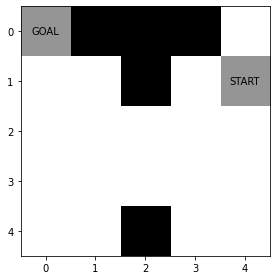

In [ ]:
map_env = np.array([[0.5, 1.0, 1.0, 1.0, 0.0],
                    [0.0, 0.0, 1.0, 0.0, 0.5],
                    [0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0, 0.0, 0.0]])

fig, ax = plt.subplots()
im = ax.imshow(map_env,cmap='Greys')

text = ax.text(4, 1, 'START',ha="center", va="center")
text = ax.text(0, 0, 'GOAL',ha="center", va="center")

fig.tight_layout()

plt.show()

We now create 2 empty dictionaries which will be used to store
 
1)the distances of each grid cell from the START node

2)the cell that directly leads to this grid cell if one were to reach it taking the shortest possible path 
respectively

In [ ]:
distances={}
prev={}

The distance of each grid cell from the START node is set to infinity initially while its "previous node" is set to None

In [ ]:
for i in range(0,5):
  for j in range(0,5):
    distances[i,j]=float('inf')
    prev[i,j]=None

Setting the distance of the starting node from itself to 0

In [ ]:
distances[4,1]=0

We now create two lists:

1)**Open**: This is used to keep track of the nodes that are currently reachable but have not been explored

2)**Closed**: This is used to keep track of nodes that have already been expored.

***Example***:

After our first iteration in the Dijkstra Algorithm, the "START" node wll be marked as "Closed", while the cells (3,1), (4,0), (4,2)and (3,2) will be marked "open" to exploration.

In [ ]:
open=[] #set of nodes to be evaluated
closed=[] #set of nodes that have been evaluated

In [ ]:
open.append([4,1]) #add starting node to 'open' list

In [ ]:
# get position of obstacles
# code here

obstacles = np.where(map_env == 1.0)
obstacle_Coordinates = list(zip(obstacles[1], obstacles[0]))
print(obstacle_Coordinates)



[(1, 0), (2, 0), (3, 0), (2, 1), (1, 2), (2, 2), (2, 4)]


In [ ]:
def plot_steps(current_cell,f_min):
    print('plotting')
    fig, ax = plt.subplots()
    im = ax.imshow(map_env,cmap='Greys')
    # code here
    text = ax.text(current_cell[0],current_cell[1],round(f_min,2),ha="center", va="center")
    
    fig.tight_layout()
    plt.show()

In [ ]:
next_goal=False
current_cell=[4,1]

In [ ]:
current_cell

[4, 1]

In [ ]:
open

[[4, 1]]

In [ ]:
obstacle_Coordinates

[(1, 0), (2, 0), (3, 0), (2, 1), (1, 2), (2, 2), (2, 4)]

The next block of code contains the actual working of the algorithm.

Grid cells that are directly reachable from the current cell and are not obstacles are updated with new minimum distances and are added to the "open" list so that cells directly connected to them can be explored the next.

The cell with the minimum value for distance is explored next.

In [ ]:
while (not(next_goal)):
  for i in [-1,0,1]:
    for j in [-1,0,1]:
       # check if cell_address is inside environment and address does not correspond to a obstacle
      if ((current_cell[0]+i,current_cell[1]+j) not in obstacle_Coordinates and (current_cell[0]+i >= 0) and (current_cell[0]+i <= 4) and (current_cell[1]+j >= 0) and (current_cell[1]+j <= 4)):
        
        if distances[current_cell[0]+i,current_cell[1]+j]>distances[current_cell[0],current_cell[1]]+np.power(i**2+j**2,0.5):
          
          distances[current_cell[0]+i,current_cell[1]+j]=distances[current_cell[0],current_cell[1]]+np.power(i**2+j**2,0.5)
          prev[current_cell[0]+i,current_cell[1]+j]=current_cell
          open.append([current_cell[0]+i,current_cell[1]+j])
          

        if (current_cell[0]+i==0 and current_cell[1]+j==0):
          next_goal = True
  open.remove(current_cell)
  closed.append(current_cell)
  min=float('inf')
  min_id=open[0]
  for node in open:
    temp=distances[node[0],node[1]]
    if min>temp:
      min=temp
      min_id=node
  current_cell=min_id



List of open cells at the end of Dijkstra(When goal (0,0) is reached and thus added to "open")

In [ ]:
open

[[1, 1], [0, 0]]

Printing the shortest path by making use of the "prev" dictionary.

Recall that this dictionary stored the co-ordinates of the cell that was explored directly before the given cell in the shortest path to that cell.

In [ ]:
temp_node=[0,0] #end node
start=[4,1]
path=[temp_node]
while(True):
  path.append(prev[temp_node[0],temp_node[1]])
  temp_node=prev[temp_node[0],temp_node[1]]
  if temp_node==start:
    break
path

[[0, 0], [0, 1], [0, 2], [1, 3], [2, 3], [3, 2], [4, 1]]

Plotting the final shortest path from START to END

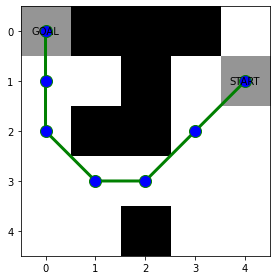

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(map_env,cmap='Greys')

# code here
path = np.array(path)
x = path[:,0]
y = path[:,1]

plt.plot(x, y, color='green', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)

text = ax.text(4, 1, 'START',ha="center", va="center")
text = ax.text(0, 0, 'GOAL',ha="center", va="center")

fig.tight_layout()

plt.show()